In [1]:
import matplotlib.pyplot as plt
import pprint
from pims import ND2Reader_SDK
pp = pprint.PrettyPrinter(indent=0)
from tabulate import tabulate
from tqdm.auto import tqdm 
import cv2
import numpy as np
from cowpy import cow
from celluloid import Camera
import colorama
from termcolor import colored
from joblib import Parallel, delayed, parallel_backend
import yaml
import argparse
import os

In [86]:
directory = "/media/georgeos/Ext5TB/SB5_SB8_SB13.nd2"

frames = ND2Reader_SDK(directory)

/home/georgeos/miniconda3/lib/python3.9/site-packages/pims/base_frames.py:478: UserWarning: Please call FramesSequenceND.__init__() at the start of thethe reader initialization.
  warn("Please call FramesSequenceND.__init__() at the start of the"


In [107]:
dir(frames)

['__abstractmethods__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_buf_md',
 '_buf_p',
 '_buf_p_a',
 '_buf_p_size',
 '_bundle_axes',
 '_clear_axes',
 '_default_coords',
 '_frame_rate',
 '_get',
 '_get_frame_dict',
 '_get_frame_wrapped',
 '_handle',
 '_init_axis',
 '_iter_axes',
 '_lim_attributes',
 '_lim_experiment',
 '_lim_frame_shape',
 '_lim_metadata_desc',
 '_pixel_size',
 '_pixel_type',
 '_pixel_type_C',
 '_register_get_frame',
 '_sizes',
 '_slicerator_flag',
 '_z_home',
 'axes',
 'bundle_axes',
 'calibration',
 'class_exts',
 'class_priority',
 'clos

In [88]:
frames.__iter__

<bound method FramesSequence.__iter__ of <FramesSequenceND>
Axes: 5
Axis 'x' size: 2304
Axis 'y' size: 964
Axis 'c' size: 3
Axis 't' size: 533
Axis 'm' size: 59
Pixel Datatype: <class 'numpy.uint16'>>

In [89]:
dir(frames.get_frame(0))

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__ne

In [90]:
times = []
for frame in frames:
    times.append(frame.metadata["t_ms"])

In [96]:
times = np.array(times)

Text(0, 0.5, 'Timepoint spacing (minute)')

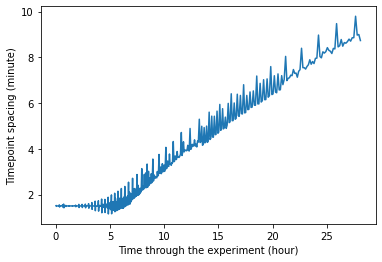

In [106]:
plt.plot(times[1:]/(3.6*10**6),np.diff(times)/(60_000))
plt.xlabel("Time through the experiment (hour)")
plt.ylabel("Timepoint spacing (minute)")

In [94]:
times

[677.4340007305145,
 91418.51603198051,
 180316.65299487114,
 270225.53605151176,
 360181.74503588676,
 450162.642008543,
 540229.9498698711,
 630192.2189128399,
 720142.479899168,
 810224.8729655743,
 900161.1669108868,
 990183.479899168,
 1080216.9808757305,
 1173065.0128581524,
 1260159.588053465,
 1350222.7928874493,
 1440168.3358561993,
 1530190.7049968243,
 1620247.0480144024,
 1710170.0648601055,
 1800168.975992918,
 1890239.770914793,
 1980176.51188159,
 2070162.4999186993,
 2160238.2179362774,
 2253221.384928465,
 2340167.268961668,
 2430242.9679362774,
 2520230.3180339336,
 2615128.779947996,
 2700250.029947996,
 2790185.652994871,
 2880193.4579265118,
 2970244.860026121,
 3060193.3859050274,
 3150206.767008543,
 3240249.367838621,
 3331562.9149577618,
 3420191.7140300274,
 3510302.5438640118,
 3600197.5909831524,
 3690187.904947996,
 3780181.0160319805,
 3870129.1319987774,
 3960143.5570476055,
 4050187.724039793,
 4140157.4340007305,
 4230138.05094409,
 4320194.339030027,
 